https://github.com/mica5/statistics/blob/master/plotting.ipynb

# Plotting

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import seaborn as sns
import pandas as pd
from IPython.display import display


## Stem and leaf display

In [2]:
# presidential Commission on the Space Shuttle Challenger Accident, Vol. 1, 1986: 129-131
o_ring_temperatures = [84, 49, 61, 40, 83, 67, 45, 66, 70, 69, 80, 58, 68, 60, 67, 72, 73, 70, 57, 63, 70, 78, 52, 67, 53, 67, 75, 61, 70, 81, 76, 79, 75, 76, 58, 31]

def stem_and_leaf_display(data):
    """print a stem-and-leaf display to standard output

    This is a very primitive algorithm, as it only works for
    two-digit numbers. It is only for demonstrative purposes.
    """
    sld = dict()
    for n in data:
        stem = str(n)[0]
        if stem not in sld:
            sld[stem] = list()
        sld[stem].append(str(n)[-1])
    lowkey = min(sld.keys())
    highkey = max(sld.keys())
    for i in range(int(lowkey), int(highkey)+1, 1):
        i = '{}'.format(i)
        if i not in sld:
            sld[i] = list()
    for stem in sorted(sld.keys()):
        print(stem+'|', end='')
        for value in sorted(sld[stem]):
            print(value, end='')
        print()
    return sld

sld = stem_and_leaf_display(o_ring_temperatures)
print("Stem: tens digit\nLeaf: ones digit")

3|1
4|059
5|23788
6|01136777789
7|000023556689
8|0134
Stem: tens digit
Leaf: ones digit


It can be seen that stems 6 and 7 are the typical/representative values.

If there are too many leaves in a single stem, the stem can be separated to low and high; for example, 6 can be split into 6L and 6H, where 6L will contain leaves 0-4 and 6H will contain leaves 5-9.
<br><br>
<div style="font-family: Monaco">
3L | 1<br>
3H | <br>
4L | 0<br>
4H | 59<br>
5L | 23<br>
5H | 788<br>
6L | 0113<br>
6H | 6777789 - typical value<br>
7L | 000023<br>
7H | 556689<br>
8L | 0134<br>
</div>

Midterm material:<br>
representative value: (mid 60s in 6H) -> stem with biggest number of leaves<br>
spread: the extent of spread about typical value is rather substantial (i.e. from looking at the plot, you might expect a relatively small standard deviation)<br>
gaps: one gap - no observations in stem 3H<br>
number of peaks: one peak<br>
symmetry: no symmetry; the plot is negatively skewed<br>
outliers: in this case, 31 might be an outlier

Advantages of stem-and-leaf plot: easy to construct, no loss of information (original data can be reconstructed from the diagram)<br>
Disadvantage: doesn't work well when there's a lot of data, doesn't show the order in which the data was collected (can't show time series)

Below is a time series:

the stem and leaf plots look the same - information can't be differentiated
4|89
5|001

4|89
5|001

but with a plot like this, the information can be seen over time:


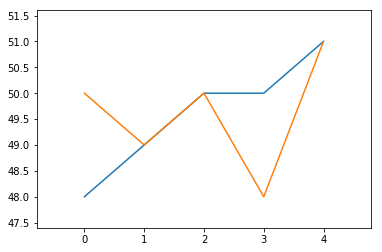

In [3]:
sample1 = [48, 49, 50, 50, 51]
sample2 = [50, 49, 50, 48, 51]
print("the stem and leaf plots look the same - information can't be differentiated")
stem_and_leaf_display(sample1)
print()
stem_and_leaf_display(sample2)

print("\nbut with a plot like this, the information can be seen over time:")
plt.margins(0.2)
plt.plot(np.arange(len(sample1)), sample1)
plt.plot(np.arange(len(sample2)), sample2)
plt.show()

## Dotplot

Works for maybe 30-50 observations. looks a little like a beeswarm plot, but all the values are stacked.

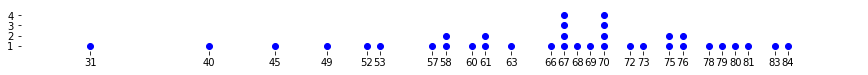

In [4]:
def dotplot(data):
    """dotplot in matplotlib

    maybe google will index matplotlib dotplot.
    I know it's not very pretty, but I couldn't find an existing version of a matplotlib dotplot."""
    c = Counter(data)
    plt.figure(figsize=(15, 0.75))
    plt.margins(0.1, 0.8)

    maxnum = 0
    for k, v in c.items():
        maxnum = max(maxnum, v+1)
        plt.plot([k]*v, list(range(1, v+1, 1)), 'bo')
    plt.gca().set_yticks(list(range(1, maxnum, 1)))
    plt.gca().set_xticks(list(c.keys()))
    plt.gca().set_frame_on(False)
    plt.ylim(0.5, maxnum - 0.5)
    plt.show()

dotplot(o_ring_temperatures)

# Discrete vs continuous data, histograms and boxplots

Continuous data can be any decimal number, e.g. although we often truncate a temperature when we're talking about it like "71 degrees fahrenheit", temperature is continuous because it's actually (for example) 71.56209 degrees fahrenheit. We don't usually talk about the decimal place unless we're dealing with statistics/science/data. Continuous data is usually from taking a measurement of something.<br>
Discrete data is like the number of times something happened. Either you went to the store or you didn't; you can't go to the store a half of a time. So the number of times you went to the store will always either be 0 or a positive integer multiple of 1 (never a decimal place). Discrete data is often a result of counting things. Another example would be the number of patients admitted to an emergency room in a given 24-hour period.

finite set of possible values, or "countably infinite" which can be listed in an infinite sequence. Mathematical concept.

The stem-and-leaf display is good for discrete data, but gets complicated or impractical for continuous data. It is also good for moderately-sized datasets (15-150 observations). For continuous data, a more appropriate plot might be a histogram or a beeswarm plot (although a histogram could be used for discrete data).

Histograms and boxplots are better for larger datasets.

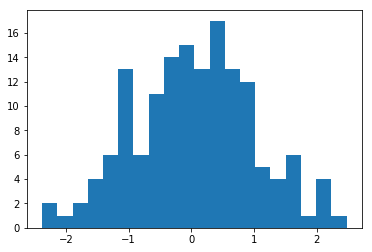

A histogram shows a frequency distribution. The histogram above and the beeswarm plot below are displaying the same data.


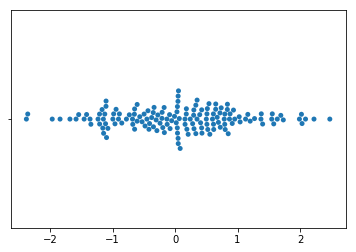

A beeswarm plot shows the exact values, whereas a histogram shows aggregates grouped by ranges.


In [5]:
np.random.seed(4)
data = np.random.normal(size=150)

plt.hist(data, bins=20)
plt.show()
print("A histogram shows a frequency distribution. The histogram above and the beeswarm plot below are displaying the same data.")

sns.swarmplot(data)
plt.show()
print("A beeswarm plot shows the exact values, whereas a histogram shows aggregates grouped by ranges.")


Devore, 16<br>
frequency: total number of times a particular observation is observed<br>
$\text{relative frequency of a value} = \frac{\text{number of times the value occurs}}{\text{number of observations in the data set}}$


## Histograms for discrete data

In [6]:
numbers_of_prev_convictions = [0, 1, 1, 3, 0, 1, 2, 1, 4, 1, 0, 1, 1, 0, 1, 2, 0, 1, 2, 1, 0, 1, 3, 1, 0, 4, 2, 1, 1, 1, 3, 0, 0, 1, 2, 1, 1, 1, 2, 0, 4, 3]
df = pd.DataFrame(numbers_of_prev_convictions, columns=['numbers_of_prev_convictions'])
df.head()
# numbers_of_prev_convictions_series = pd.Series(sorted(numbers_of_prev_convictions))

,numbers_of_prev_convictions
0,0
1,1
2,1
3,3
4,0


In [7]:
print("Frequencies:")
freqs = df.numbers_of_prev_convictions.value_counts().sort_index()
freqs

Frequencies:


0    10
1    19
2     6
3     4
4     3
Name: numbers_of_prev_convictions, dtype: int64

In [8]:
print("Relative frequencies:")
rel_freqs = freqs / freqs.sum()
display(pd.DataFrame(
    list(zip(freqs.apply(lambda x: '{}/{}'.format(x, freqs.sum())), rel_freqs)),
    columns=['proportions as fractions', 'proportions as decimals']
))

print("should add to approximately 1:", rel_freqs.sum())

Relative frequencies:


,proportions as fractions,proportions as decimals
0,10/42,0.238095
1,19/42,0.452381
2,6/42,0.142857
3,4/42,0.095238
4,3/42,0.071429


should add to approximately 1: 0.9999999999999999


In [9]:
print("Proportion with more than 1 conviction: {:.2f}".format(rel_freqs[rel_freqs.index>1].sum()))

Proportion with more than 1 conviction: 0.31


In [10]:
rel_freqs

0    0.238095
1    0.452381
2    0.142857
3    0.095238
4    0.071429
Name: numbers_of_prev_convictions, dtype: float64

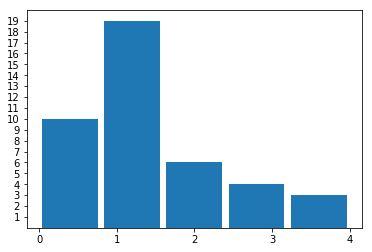

In [11]:
plt.hist(numbers_of_prev_convictions, bins=len(set(numbers_of_prev_convictions)), rwidth=0.9)
axis = plt.gca()
axis.set_xticks(list(set(numbers_of_prev_convictions)))
axis.set_yticks(list(range(1, df.numbers_of_prev_convictions.value_counts().max()+1, 1)))

plt.show()

## Histogram: continuous case / equal class width

In [12]:
mileage_ratings = [30, 31.8, 32.5, 32.7, 32.9, 32.9, 33.1, 33.2, 33.6, 33.8, 33.9, 33.9, 34, 34.2, 34.4, 34.5, 34.8, 34.8, 35, 35.1, 35.2, 35.3, 35.5, 35.6, 35.6, 35.7, 35.8, 35.9, 35.9, 36, 36.1, 36.2, 36.3, 36.3, 36.4, 36.4, 36.5, 36.5, 36.6, 36.6, 36.7, 36.7, 36.7, 36.8, 36.8, 36.8, 36.9, 36.9, 36.9, 37, 37, 37, 37, 37.1, 37.1, 37.1, 37.2, 37.2, 37.3, 37.3, 37.4, 37.4, 37.5, 37.6, 37.6, 37.7, 37.7, 37.8, 37.9, 37.9, 38, 38.1, 38.2, 38.2, 38.3, 38.4, 38.5, 38.6, 38.7, 38.8, 39, 39, 39.3, 39.4, 39.5, 39.7, 39.8, 39.9, 40, 40.1, 40.2, 40.3, 40.5, 40.5, 40.7, 41, 41, 41.2, 42.1, 44.9]

$\text{a b c d}$

Step 1: calculate range R = largest observation to smallest = 44.9-30 = 14.9.<br>
Step 2: choose number of intervals.

Empirical rules (no scientific evidence explaining which one to use or why, they are just good guidelines):<br>
Sturgis' rule $k=1+3.2 \log_{10}n = 1+3.2 \log_{10}100 = 7.4 \approx 8$<br>
Rice rule: $k= 2 \cdot \sqrt[3]{n} = 2 \cdot \sqrt[3]{100} \approx 9.28 \approx 9$

Find interval width $\Delta=\frac{R}{k}=\frac{14.9}{8}=1.8625\approx 1.9$

$31.85=29.95+\Delta=29.95+1.9$

In the book's notation, in "30-<31.9", "30-" means "number that is smaller than 30". When a number falls on the border, place it in the interval on the right. Alternatively, use an extra decimal place with 0.5 compared to the numbers of decimal places in the dataset, e.g. "29.95 to 31.85" instead of "30-<31.9", so the results are the same but it's clearer which interval a datapoint falls in, instead of having to remember that a value that falls on the border number in the interval goes to the right side.

Step 3: Over each interval, draw a rectangle:<br>
base = interval width<br>
height = relative frequency or $\text{density} = \frac{\text{relative frequency}}{\text{interval width}}$<br>
important to use density scale on unequal class width. For equal, relative frequency; unequal, must use density.

Area of histogram:
area for each rectangle: $\text{density} \cdot \text{interval width} = \text{relative frequency}$

To see more information about roots in $\LaTeX$, see https://tex.stackexchange.com/questions/49043/nice-looking-p-th-roots/49045#49045

A curve superimposed over this histogram is called a 'density estimate' or 'density curve'. It tells you the shape of the distribution - in this case, symmetric.


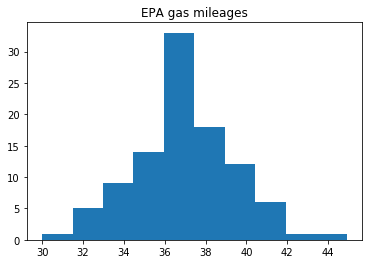

In [13]:
print("A curve superimposed over this histogram is called a 'density estimate' or 'density curve'. It tells you the shape of the distribution - in this case, symmetric.")
plt.title("EPA gas mileages")
plt.hist(mileage_ratings, bins=10)
plt.show()

## Skew

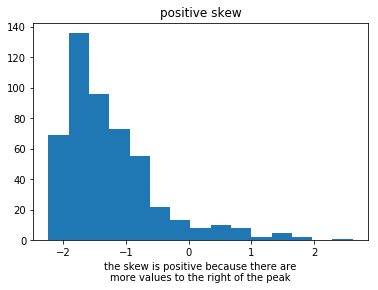

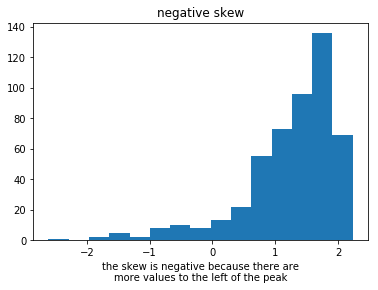

In [14]:
bins = 15
np.random.seed(0)
p = positive = np.random.lognormal(sigma=.6, size=500)
p = p - (p.max() - p.min())/2
plt.hist(p, bins=bins)
plt.title("positive skew")
plt.xlabel("the skew is positive because there are\nmore values to the right of the peak")
plt.show()

n = negative = positive * -1
n = n + (n.max()-n.min())/2

plt.hist(n, bins=bins)
plt.title("negative skew")
plt.xlabel("the skew is negative because there are\nmore values to the left of the peak")
plt.show()

## Histograms and modality

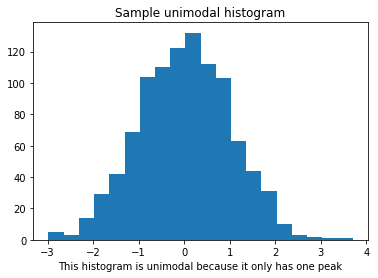

In [15]:
np.random.seed(3)
data = np.random.normal(size=1000)
plt.hist(data, bins=20)
plt.title('Sample unimodal histogram')
plt.xlabel("This histogram is unimodal because it only has one peak")
plt.show()

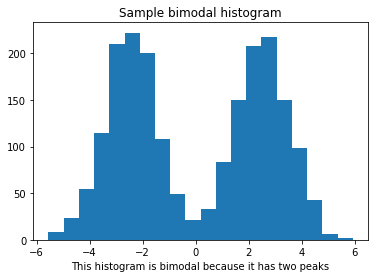

In [16]:
i = 2.5
np.random.seed(1)
data1 = np.random.normal(-i, size=1000)
data2 = np.random.normal(i, size=1000)
data = np.concatenate((data1, data2))
plt.hist(data, bins=20)
plt.title('Sample bimodal histogram')
plt.xlabel("This histogram is bimodal because it has two peaks")
plt.show()

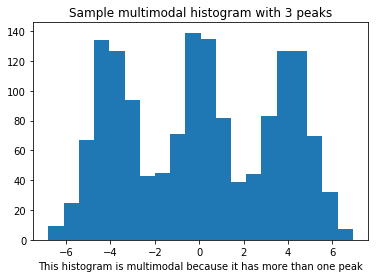

In [17]:
i = 4
size = 500
np.random.seed(1)
a, b, c = np.linspace(-i, i, 3)
data1 = np.random.normal(a, size=size)
data2 = np.random.normal(b, size=size)
data3 = np.random.normal(c, size=size)
data = np.concatenate((data1, data2, data3))
plt.hist(data, bins=20)
plt.title('Sample multimodal histogram with 3 peaks')
plt.xlabel("This histogram is multimodal because it has more than one peak")
plt.show()

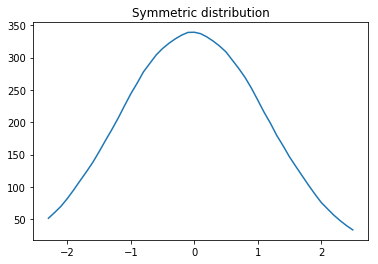

CPU times: user 122 ms, sys: 7.74 ms, total: 130 ms
Wall time: 128 ms


In [18]:
%%time
np.random.seed(0)

data = np.random.normal(size=10000)

c = Counter([round(d, 1) for d in data])

x = sorted(c.keys())
y = pd.Series([c[v] for v in x])

smooth = 10
r = range(-smooth, smooth+1, 1)
y = sum([y.shift(i) for i in r]) / len(r)

plt.plot(x, y)
plt.title('Symmetric distribution')
plt.show()